In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 400)
import matplotlib.pyplot as plt
import psycopg2

In [19]:
sql_query = """SELECT * FROM results"""
con = psycopg2.connect(database='results_db', user='ana', host='localhost', password='nonsense')
results = pd.read_sql_query(sql_query,con)

In [21]:
primes = results[results['flen_max']==-1]
zooms = results[results['flen_max']!=-1]

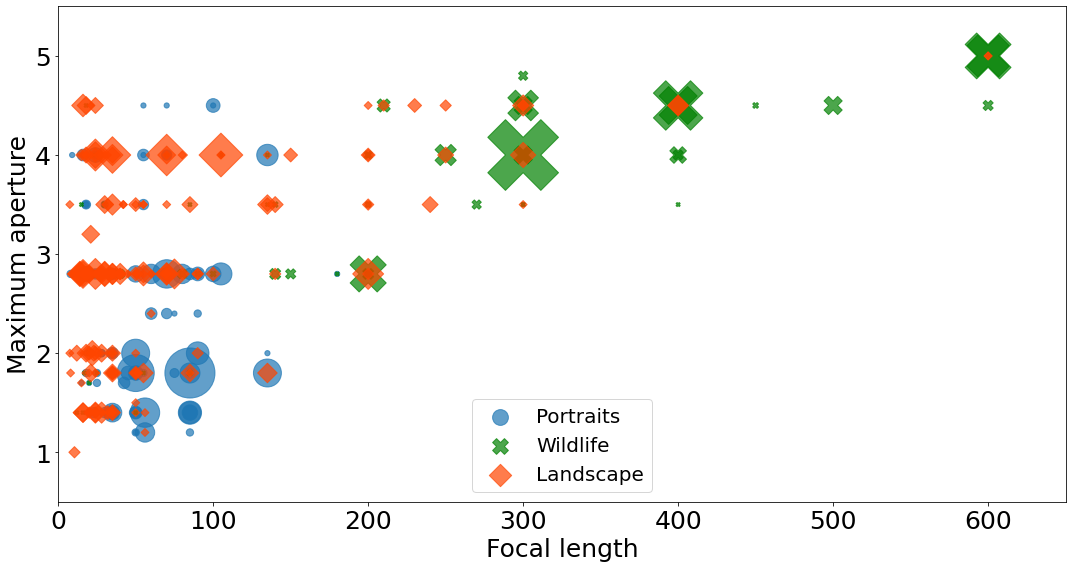

In [80]:
plt.figure(figsize=[15,8])
plt.scatter(x=results['flen_min'], y=results['f_min'], s=2e4/741.*results['portraits_score'], alpha=.7, label='Portraits', marker = 'o',  cmap='blue')

plt.scatter(x=primes['flen_min'], y=primes['f_min'], s=2e4/1150.*primes['wildlife_score'],  alpha=.7, label='Wildlife',  marker = 'X',  color='green')
plt.scatter(x=zooms['flen_max'], y=zooms['f_min'], s=2e4/1150.*zooms['wildlife_score'],  alpha=.7, label='_nolegend_',  marker = 'X',  color='green')

plt.scatter(x=primes['flen_min'], y=primes['f_min'], s=2e4/625*primes['landscape_score'], alpha=.7, label='Landscape', marker = 'D',  color='orangered')
plt.scatter(x=zooms['flen_max'], y=zooms['f_min'], s=2e4/625*zooms['landscape_score'], alpha=.7, label='_nolegend_',marker = 'D',  color='orangered')

# plt.scatter(x=primes['flen_min'], y=primes['f_min'], s=2e4/705*primes['low_light_score'], alpha=.5, label='Low light',marker = 'v', color='orangered')
# plt.scatter(x=zooms['flen_max'], y=zooms['f_min'], s=2e4/705*zooms['low_light_score'], alpha=.5, label='_nolegend_',marker = 'v', color='orangered')

plt.xlim(0,650)
plt.ylim(0.5,5.5)

fsize = 25

# plt.title('Usage score', fontsize=fsize)
plt.xlabel('Focal length', fontsize=fsize)
plt.ylabel('Maximum aperture', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

lgnd = plt.legend(loc="lower center", scatterpoints=1, fontsize=20)
lgnd.legendHandles[0]._sizes = [fsize*10]
lgnd.legendHandles[1]._sizes = [fsize*10]
lgnd.legendHandles[2]._sizes = [fsize*10]
plt.tight_layout()
plt.savefig('usage.jpg')